In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# MICCAI 2023 phantom experiment

In [3]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

In [20]:
# define the job template and name format

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
source activate MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --noise_ratio {noise_ratio} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --anatomical {anatomical} \\
    --a_loss_weight {a_loss_weight} \\
    --patch_size {patch_size} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{omega}_{pde_name}_{a_loss_weight:.0e}'

# define the parameter space

param_space0 = ps.ParamSpace(
    data_name='phantom',
    xarray_dir='../../../data/BIOQIC/phantom',
    example_id=80, #[30, 40, 50, 60, 70, 80, 90, 100],
    frequency='auto',
    noise_ratio=0.0,
    omega=[60, 90, 120, 150, 180],
    pde_name=['helmholtz', 'hetero'],
    pde_init_weight=1e-12,
    pde_loss_weight=1e-10,
    polar_input=0,
    anatomical=True,
    a_loss_weight=[0, 1e-4, 1e-2, 1e0, 1e2],
    patch_size=[1]
)

param_space = param_space0
len(param_space)

50

In [24]:
name.format(**list(param_space)[24])

'train_phantom_120_helmholtz_1e+02'

In [6]:
%autoreload
#expt_name = '2022-11-23_phantom_init'
#expt_name = '2022-11-26_phantom_hetero2'
expt_name = '2022-2-2_phantom_anat'

#jobs = ps.submit(template, name, param_space, work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

jobs = pd.read_csv(f'{expt_name}.jobs')

In [7]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs)[status_cols]
status

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
14261881,train_phantom_60_helmholtz_0e+00,NaN,NaN,NaN,v030.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261883,train_phantom_60_helmholtz_1e-04,NaN,NaN,NaN,v030.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261884,train_phantom_60_helmholtz_1e-02,NaN,NaN,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261885,train_phantom_60_helmholtz_1e+00,NaN,NaN,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261886,train_phantom_60_helmholtz_1e+02,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261887,train_phantom_60_hetero_0e+00,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261888,train_phantom_60_hetero_1e-04,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261889,train_phantom_60_hetero_1e-02,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261890,train_phantom_60_hetero_1e+00,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...


In [9]:
status[status.stderr != 'Using backend: pytorch\n\n']

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
14261881,train_phantom_60_helmholtz_0e+00,NaN,NaN,NaN,v030.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261883,train_phantom_60_helmholtz_1e-04,NaN,NaN,NaN,v030.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261884,train_phantom_60_helmholtz_1e-02,NaN,NaN,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261885,train_phantom_60_helmholtz_1e+00,NaN,NaN,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261886,train_phantom_60_helmholtz_1e+02,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261887,train_phantom_60_hetero_0e+00,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261888,train_phantom_60_hetero_1e-04,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261889,train_phantom_60_hetero_1e-02,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14261890,train_phantom_60_hetero_1e+00,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...


In [10]:
print(status.iloc[0].stderr)

Using backend: pytorch

  return key in self.data

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()


In [35]:
metrics = ps.metrics(jobs)

# did all models train to 100k iterations?
assert (metrics.groupby('job_name')['iteration'].max() == 100e3).all()

# get the final test evaluations
metrics = metrics[metrics.iteration == 100e3]

param_cols = ['pde_name', 'omega', 'a_loss_weight'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
metrics = metrics.unstack(level=[len(param_cols)])

def metric_map(t):
    metric_name, var_name = t
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
metrics

a_pred_MSAV  \
pde_name  omega a_loss_weight spatial_frequency_bin spatial_region                  
helmholtz 60    0.0           all                   all             158354.234914   
                                                    0                         NaN   
                                                    1                         NaN   
                                                    2                         NaN   
                                                    3                         NaN   
...                                                                           ...   
hetero    180   100.0         6.0                   all                       NaN   
                              7.0                   all                       NaN   
                              8.0                   all                       NaN   
                              9.0                   all                       NaN   
                              10.0                  all                       NaN   

                                                                      a_pred_MSAE  \
pde_name  omega a_loss_weight spatial_frequency_bin spatial_region                  
helmholtz 60    0.0           all                   all             126106.550678   
                                                    0                         NaN   
                                                    1                         NaN   
                                                    2                         NaN   
                                                    3                         NaN   
...                                                                           ...   
hetero    180   100.0         6.0                   all                       NaN   
                              7.0                   all                       NaN   
                              8.0                   all                       NaN   
                              9.0                   all                       NaN   
                              10.0                  all                       NaN   

                                                                      a_true_MSAV  \
pde_name  omega a_loss_weight spatial_frequency_bin spatial_region                  
helmholtz 60    0.0           all                   all             151863.082822   
                                                    0                         NaN   
                                                    1                         NaN   
                                                    2                         NaN   
                                                    3                         NaN   
...                                                                           ...   
hetero    180   100.0         6.0                   all                       NaN   
                              7.0                   all                       NaN   
                              8.0                   all                       NaN   
                              9.0                   all                       NaN   
                              10.0                  all                       NaN   

                                                                    u_pred_MSAV  \
pde_name  omega a_loss_weight spatial_frequency_bin spatial_region                
helmholtz 60    0.0           all                   all                 0.00006   
                                                    0                       NaN   
                                                    1                       NaN   
                                                    2                       NaN   
                                                    3                       NaN   
...                                                                         ...   
hetero    180   100.0         6.0                   all                     NaN   
     

<IPython.core.display.Javascript object>


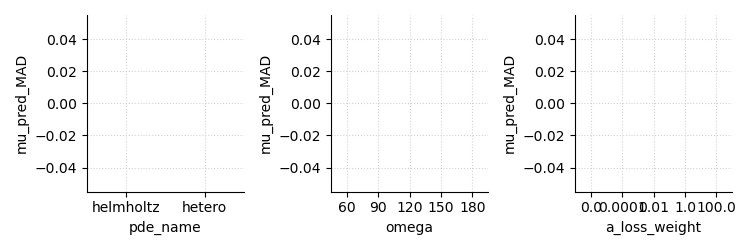

In [36]:
m = metrics.reset_index()

fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')].copy(),
    x=param_cols,
    y=['mu_pred_MAD'],
    height=2.5,
    width=2.5,
    legend=False,
    tight=True
)

<IPython.core.display.Javascript object>


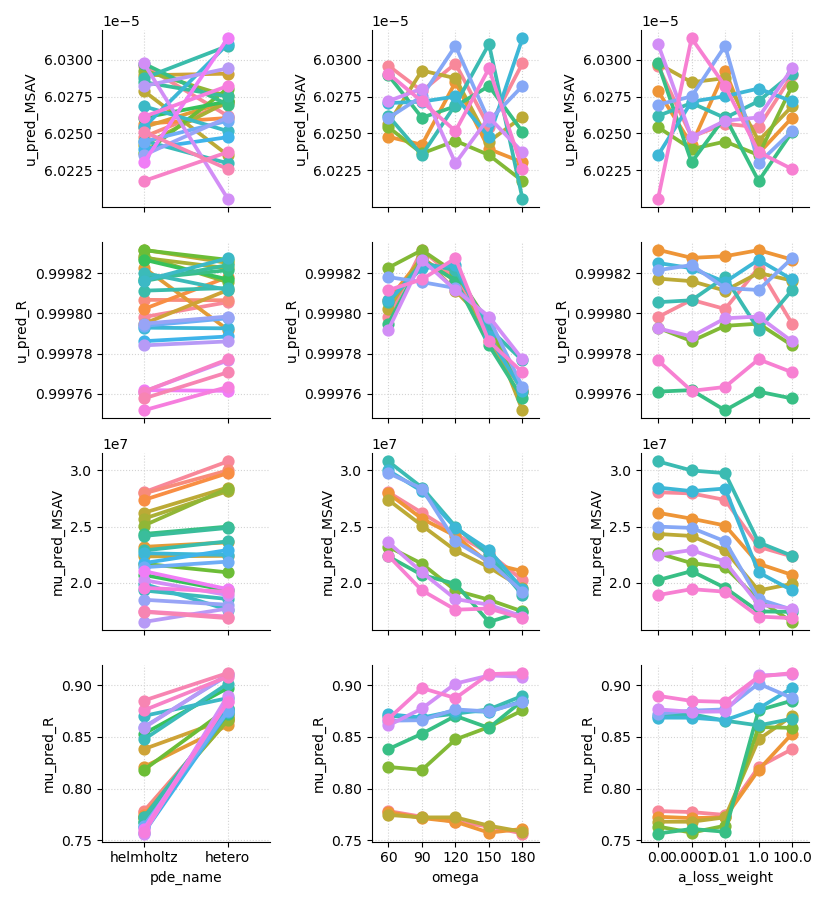

In [41]:
m = metrics.reset_index()

fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')].copy(),
    x=param_cols,
    y=['u_pred_MSAV', 'u_pred_R', 'mu_pred_MSAV', 'mu_pred_R'],
    height=2.25,
    width=2.75,
    legend=False,
    tight=True
)

In [15]:
m['method'] = 'PINN_' + m['pde_name']

direct_helmholtz_m = m[m.pde_name == 'helmholtz'].copy()
direct_helmholtz_m['method'] = 'direct_helmholtz'
for col in m.columns:
    if col.startswith('direct'):
        direct_helmholtz_m[col.replace('direct', 'mu')] = m[col]

fem_helmholtz_m = m[m.pde_name == 'helmholtz'].copy()
fem_helmholtz_m['method'] = 'FEM_helmholtz'
for col in m.columns:
    if col.startswith('fem'):
        fem_helmholtz_m[col.replace('fem', 'mu')] = m[col]
        
fem_hetero_m = m[m.pde_name == 'hetero'].copy()
fem_hetero_m['method'] = 'FEM_hetero'
for col in m.columns:
    if col.startswith('fem'):
        fem_hetero_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([direct_helmholtz_m, fem_helmholtz_m, fem_hetero_m, m])

In [16]:
import matplotlib as mpl
pct_format = mpl.ticker.PercentFormatter()

mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV'] * 100
mm['mu_pred_MAD_relative'] = mm['mu_pred_MAD'] / mm['mu_true_MAV'] * 100

In [17]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [red, yellow, green, cyan, blue]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]

In [18]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

<IPython.core.display.Javascript object>


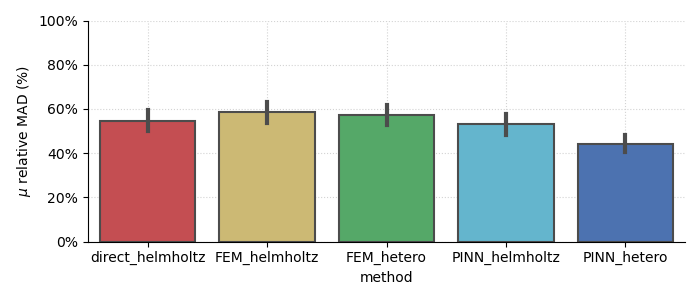

In [25]:
fig = ps.plot(
    mm[(mm.spatial_region != 'all') & (mm.spatial_region != '0')].copy(), # across all omegas
    x='method',
    hue='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].set_ylim(0, 100)
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_method_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


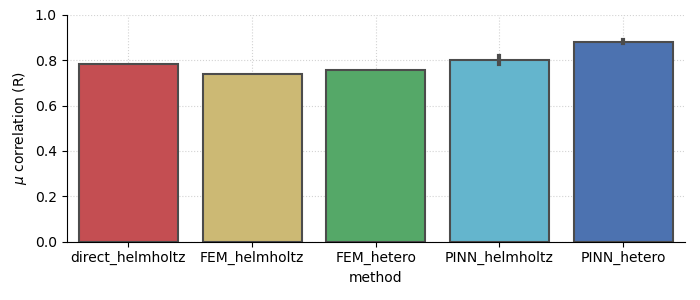

In [22]:
fig = ps.plot(
    mm[(mm.spatial_region == 'all') & (mm.spatial_frequency_bin == 'all')].copy(), # across all omegas
    x='method',
    hue='method',
    y='mu_pred_R',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_ylim([0, 1])

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_method_R_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


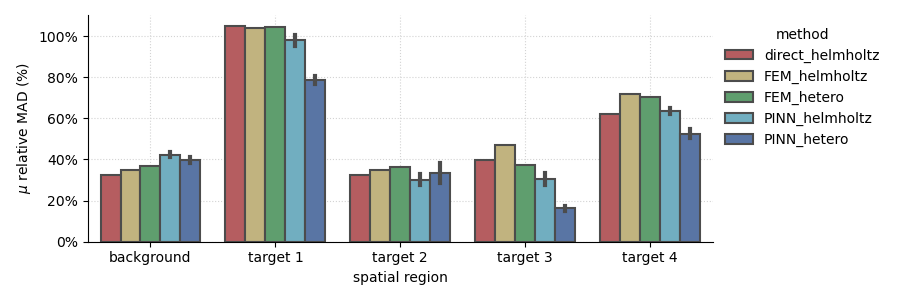

In [23]:
fig = ps.plot(
    mm[(mm.spatial_region != 'all') & (mm.spatial_region != '0')],
    x='spatial_region',
    y='mu_pred_MAD_relative',
    hue='method',
    height=3,
    width=9,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

fig.axes[0].set_xlabel('spatial region')
fig.axes[0].set_xticklabels(['background', 'target 1', 'target 2', 'target 3', 'target 4'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_region_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'})],
    x='example_id',
    y='mu_pred_MAD_relative',
    hue='method',
    height=5,
    width=7,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.tight_layout()

fig.axes[0].set_xlabel('frequency (Hz)')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_frequency_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
mm.omega.unique()

In [ ]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'}) & mm.method.str.startswith('PINN')], 
    x='example_id',
    y='mu_pred_MAD_relative',
    hue='omega',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.tight_layout()

fig.axes[0].set_xlabel('frequency (Hz)')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_omega_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload

blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = sns.color_palette('tab10')

mre_pinn.visual.COLORS.update(
    red=red,
    yellow=yellow,
    green=green,
    cyan=cyan,
    blue=blue
)

In [ ]:
dataset = mre_pinn.data.MREDataset.load_xarrays(
    xarray_dir='../data/BIOQIC/phantom'
)
dataset[0].view('mre_mask', ax_height=1.5, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/phantom_regions.png', dpi=200, bbox_inches='tight')
dataset[0].view('mre', ax_height=1.5, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/phantom_mre.png', dpi=200, bbox_inches='tight')

In [ ]:
%autoreload
import mre_pinn

# wave images

image_names = ['wave image']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.1
    ax_height = ax_width * 80 / 100
    
    data_name = 'phantom'
    omega = 30

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0 and False:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave.sel(component='z')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'direct_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)
                
            elif image_name == 'FEM_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'])
fig0 = plot_image_grid(['30', '40', '50', '60'])
fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_wave_grid.{ext}', bbox_inches='tight', dpi=200)
    fig0.savefig(f'images/phantom_wave_grid0.{ext}', bbox_inches='tight', dpi=200)
    fig1.savefig(f'images/phantom_wave_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload
import mre_pinn

image_names = ['wave image', 'ground truth', 'direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.1
    ax_height = ax_width * 80 / 100
    
    data_name = 'phantom'
    omega = 30

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave.sel(component='z')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'direct_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)
                
            elif image_name == 'FEM_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                job_name = name.format(
                    data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                )
                nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'])
#fig0 = plot_image_grid(['30', '40', '50', '60'])
#fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_example_grid.{ext}', bbox_inches='tight', dpi=200)
    #fig0.savefig(f'images/phantom_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    #fig1.savefig(f'images/phantom_example_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload
import mre_pinn

image_names = [
    'ground truth',
    'FEM_helmholtz',
    'FEM_hetero',
    'direct_helmholtz',
    'PINN_helmholtz',
    'PINN_hetero'
]

def plot_image_grid(example_ids, omegas):
    n_rows = len(omegas)
    n_cols = len(image_names)
    ax_width = 2
    ax_height = ax_width * 80 / 100
    
    data_name = 'phantom'

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))

    for col_idx, image_name in enumerate(image_names):
        for row_idx, omega in enumerate(omegas):
            mean_array = 0
            for example_id in example_ids:
                example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
                ax = axes[row_idx,col_idx]
                #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
                if col_idx == 0:
                    ax.set_ylabel(str(omega), fontsize='medium')
                if row_idx == 0:
                    ax.set_title(image_name, fontsize='small')
                ax.set_yticks([])
                ax.set_xticks([])

                if image_name == 'wave image':
                    array = example.wave.sel(component='z')[...,0]
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = array.real * (example.mre_mask.values[...,0] > 0)

                elif image_name == 'ground truth':
                    array = example.mre[...,0]
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'direct_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_direct.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'FEM_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'FEM_hetero':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_fem.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'PINN_helmholtz':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='helmholtz', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)

                elif image_name == 'PINN_hetero':
                    job_name = name.format(
                        data_name=data_name, example_id=example_id, pde_name='hetero', omega=omega
                    )
                    nc_file = f'{expt_name}/{job_name}/{job_name}_elastogram.nc'
                    array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=0)
                    color_kws = mre_pinn.visual.get_color_kws(array)
                    color_kws['vmin'] = -color_kws['vmax']
                    array = np.abs(array)
                    
                mean_array += array / len(example_ids)

            #color_kws['vmax'] = 2e4
            #color_kws['vmin'] = -color_kws['vmax']
            mre_pinn.visual.imshow(ax, mean_array[14:-14], **color_kws)
    return fig

fig = plot_image_grid(['30', '40', '50', '60', '70', '80', '90', '100'], [30])
#fig0 = plot_image_grid(['30', '40', '50', '60'])
#fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_multifreq_grid.{ext}', bbox_inches='tight', dpi=200)
    #fig0.savefig(f'images/phantom_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    #fig1.savefig(f'images/phantom_example_grid1.{ext}', bbox_inches='tight', dpi=200)